In [160]:
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import Utils.DiaSourceTools as DSTools
from astropy.time import Time

import lsst.afw.display.ds9 as ds9

import re

In [161]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Test/"
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_daytest/"

In [162]:
directory = DATADIR+"/detect_testSN_smooth/"
butler = dafPersist.Butler(directory) 

In [164]:
patches = []
patches_file=open(DATADIR+"patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()

In [165]:
#patches = ['25''13,11']

In [166]:
dates = []
days_file=open(DATADIR+"day_list.txt", "rb")

for day in days_file:
    day = day.replace('\n','')
    dates.append(day)

days_file.close()
print dates
print patches

['2006-01-02', '2006-01-08', '2006-01-31', '2006-02-03', '2006-02-06', '2006-02-25', '2006-03-05', '2006-04-23', '2006-04-26', '2006-04-30', '2006-05-04', '2006-05-20', '2006-05-24', '2006-05-28', '2006-06-02', '2006-06-06', '2006-06-20', '2006-06-25', '2006-06-30', '2006-07-03', '2006-07-19', '2006-07-23', '2006-07-27']
['0,5', '0,6', '0,7', '0,8', '0,9', '0,10', '0,11', '0,12', '0,13', '0,14', '0,15', '0,16', '0,17', '0,18', '0,19', '0,20', '0,21', '0,22', '0,23', '0,24', '0,25', '1,5', '1,6', '1,7', '1,8', '1,9', '1,10', '1,11', '1,12', '1,13', '1,14', '1,15', '1,16', '1,17', '1,18', '1,19', '1,20', '1,21', '1,22', '1,23', '1,24', '1,25', '2,5', '2,6', '2,7', '2,8', '2,9', '2,10', '2,11', '2,12', '2,13', '2,14', '2,15', '2,16', '2,17', '2,18', '2,19', '2,20', '2,21', '2,22', '2,23', '2,24', '2,25', '3,5', '3,6', '3,7', '3,8', '3,9', '3,10', '3,11', '3,12', '3,13', '3,14', '3,15', '3,16', '3,17', '3,18', '3,19', '3,20', '3,21', '3,22', '3,23', '3,24', '3,25', '4,5', '4,6', '4,7', '4,

In [167]:
dates_dict = {}
for date in dates:
    dates_dict[date] = []

In [168]:
catalogs = []

for date in dates:
    date_catalog = None
    for patch in patches:
        if butler.datasetExists("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
            dates_dict[date].append(patch)
            if date_catalog is None:
                date_catalog = butler.get("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
            else:
                date_catalog.extend(butler.get("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}))
        
    catalogs.append((date, date_catalog))

In [169]:
print dates_dict["2006-01-02"]

['8,6', '8,7', '8,11', '8,12', '8,14', '8,15', '8,16', '8,17', '9,5', '9,6', '9,7', '9,8', '9,9', '9,10', '9,11', '9,12', '9,13', '9,14', '9,15', '9,16', '9,17', '9,18', '9,19', '9,20', '9,21', '9,22', '9,23', '9,24', '9,25', '10,5', '10,6', '10,7', '10,8', '10,9', '10,10', '10,11', '10,12', '10,13', '10,14', '10,15', '10,16', '10,17', '10,18', '10,19', '10,20', '10,21', '10,22', '10,23', '10,24', '10,25', '11,5', '11,6', '11,7', '11,8', '11,9', '11,10', '11,11', '11,12', '11,13', '11,14', '11,15', '11,16', '11,17', '11,18', '11,19', '11,20', '11,21', '11,22', '11,23', '11,24', '11,25', '12,5', '12,6', '12,7', '12,8', '12,9', '12,10', '12,11', '12,12', '12,13', '12,14', '12,15', '12,16', '12,17', '12,18', '12,19', '12,20', '12,21', '12,22', '12,23', '12,24', '12,25', '13,5', '13,6', '13,7', '13,8', '13,9', '13,10', '13,11', '13,12', '13,13', '13,14', '13,15', '13,16', '13,17', '13,18', '13,19', '13,20', '13,21', '13,22', '13,23', '13,24', '13,25', '14,5', '14,6', '14,7', '14,8', '14,9'

In [170]:
for date,catalog in catalogs:
    print len(catalog)

43673
59614
66304
24292
31085
26296
43600
23448
50678
54430
50997
16417
35380
33332
33388
32454
27657
38928
28863
24136
16810
35108
24567


In [171]:

#multi_matches = afwTable.MultiMatch(catalogs[0].schema, {'mjd':int}, radius=afwGeom.Angle(0.000005, afwGeom.radians))

In [172]:
multi_matches = afwTable.MultiMatch(catalogs[0][-1].schema, {'mjd':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
for date, catalog in catalogs:
    t = Time(date)

    multi_matches.add(catalog, {'mjd':int(t.mjd)})
    print t.mjd
results = multi_matches.finish(removeAmbiguous=False)

53737.0
53743.0
53766.0
53769.0
53772.0
53791.0
53799.0
53848.0
53851.0
53855.0
53859.0
53875.0
53879.0
53883.0
53888.0
53892.0
53906.0
53911.0
53916.0
53919.0
53935.0
53939.0
53943.0


In [ ]:
multi_matches = afwTable.MultiMatch(catalogs[0][-1].schema, {'mjd':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))

for date in dates:
    t = Time(date)
    date_catalog = None
    for patch in patches:
        if butler.datasetExists("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
            date_catalog = butler.get("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
            multi_matches.add(date_catalog, {'mjd':int(t.mjd)})
        
    
results = multi_matches.finish(removeAmbiguous=False)    

In [ ]:
lcs = DSTools.get_light_curves_from_multimatch_results2(results)

In [ ]:
len(lcs)

In [ ]:
t_lcs = DSTools.threshold_light_curves(lcs, 3)

In [ ]:
len(t_lcs)

In [ ]:

stack_lc = []
for t_lc in t_lcs:
    stack_lc.append(DSTools.build_lightcurve3(t_lc, "base_CircularApertureFlux_3_0_flux"))

06D3bz 214.291841667 53.024825


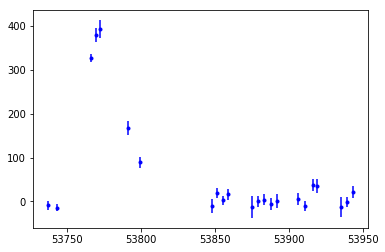

06D3cb 215.181558333 52.1910638889


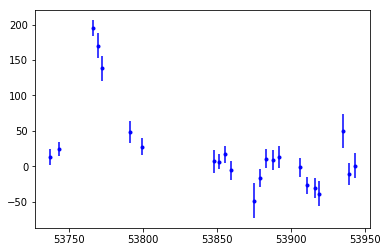

06D3cc 214.381666667 52.9124722222


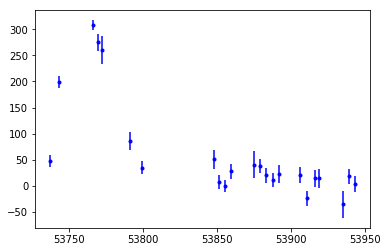

06D3cn 214.8577 52.6409833333


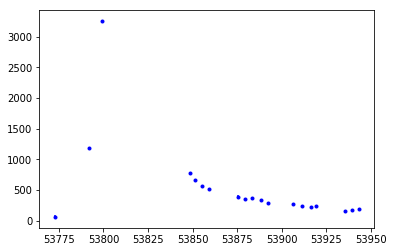

06D3df 215.571704167 52.9576805556


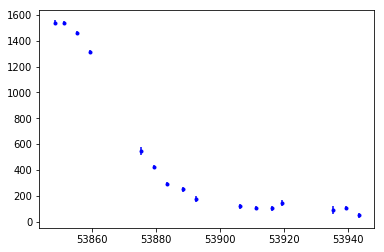

06D3dl 215.552404167 52.6408472222


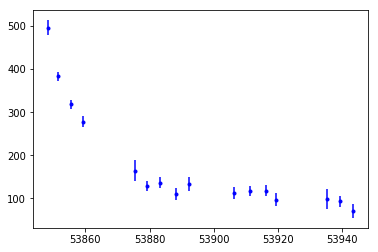

06D3do 214.247466667 52.8825444444


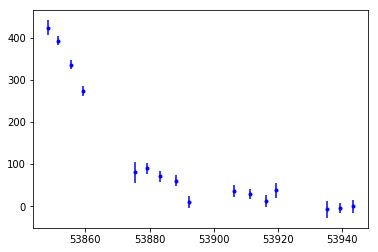

06D3dt 214.340266667 52.4528166667


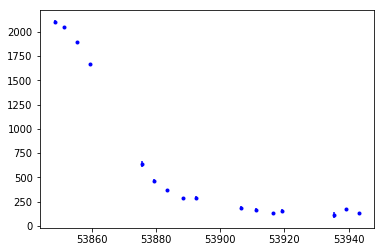

06D3ed 214.699175 52.7565583333


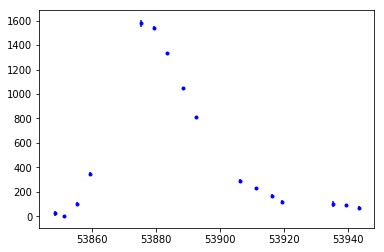

06D3el 214.254529167 52.2324


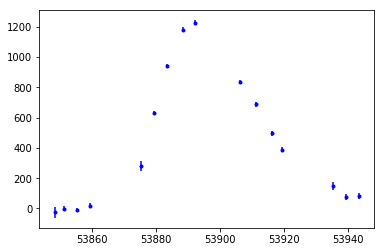

06D3em 214.847579167 53.0230138889


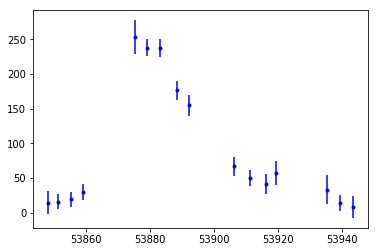

06D3en 215.305566667 52.4560777778


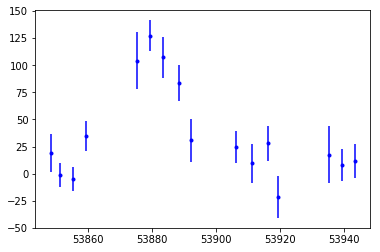

06D3et 215.519875 52.3383666667


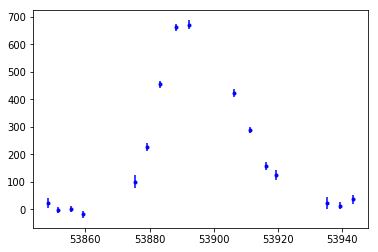

06D3fp 215.077520833 52.8971638889


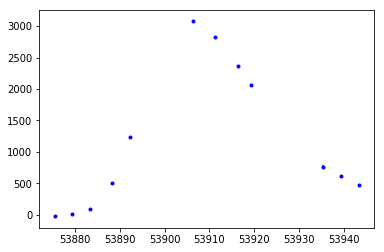

06D3gh 214.6309125 52.4429083333


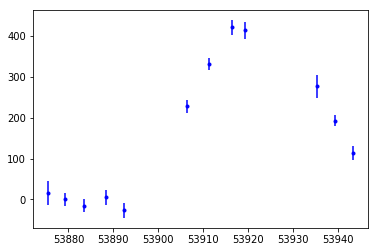

06D3gn 214.435958333 52.3611805556


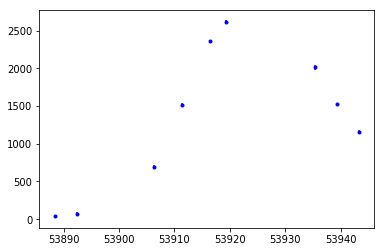

06D3gx 214.263475 52.9362527778


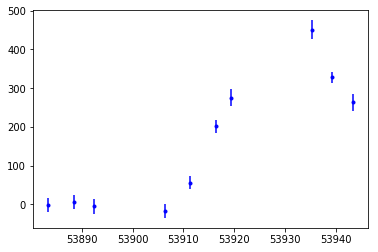

In [26]:
%matplotlib inline
import re
import astropy.coordinates as coord
import astropy.units as u

filter='r'

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

snls_array = []
for sn in elems:
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    snls_lc = DSTools.build_light_curve_from_snls_file(m, c)
   
    print sn[0], c.ra.deg, c.dec.deg
    
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    snls_array.append(snls_lc)
    plt.show()

In [96]:

matches = DSTools.match_control_group(stack_lc,snls_array)
float(len(matches))/float(len(snls_array))

0.0

In [21]:
len(matches)

0

In [22]:
for lc in snls_array:
    print "light curve"
    val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
    print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
    for slc in stack_lc:

        comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
        if DSTools.source_distance(val, comp)<1:
            print "here", len(slc)

        #print np.rad2deg(float(np.mean(slc["ra"]))), np.rad2deg(float(np.mean(slc["dec"])))

        

light curve
214.291841667 53.024825
here 3
light curve
215.181558333 52.1910638889
light curve
214.381666667 52.9124722222
light curve
214.8577 52.6409833333
light curve
215.571704167 52.9576805556
light curve
215.552404167 52.6408472222
light curve
214.247466667 52.8825444444
light curve
214.340266667 52.4528166667
light curve
214.699175 52.7565583333
light curve
214.254529167 52.2324
light curve
214.847579167 53.0230138889
light curve
215.305566667 52.4560777778
light curve
215.519875 52.3383666667
light curve
215.077520833 52.8971638889
light curve
214.6309125 52.4429083333
light curve
214.435958333 52.3611805556
light curve
214.263475 52.9362527778


In [23]:
print val, comp

{'dec': 0.92391190464021633, 'ra': 3.7396031055145569} {'dec': 0.925991 rad, 'ra': 3.74022 rad}


In [157]:
matches = []
for lc in snls_array:
    #print "light curve"
    val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
    #print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
    for slc in stack_lc:

        comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
        if DSTools.source_distance(val, comp)<1:
            matches.append((lc,slc))
            
            
print len(matches)

1


In [158]:
for match in matches:
    print np.rad2deg(match[0][0]['ra']), np.rad2deg(match[0][0]['dec'])

215.305566667 52.4560777778


4
215.305566667 52.4560777778


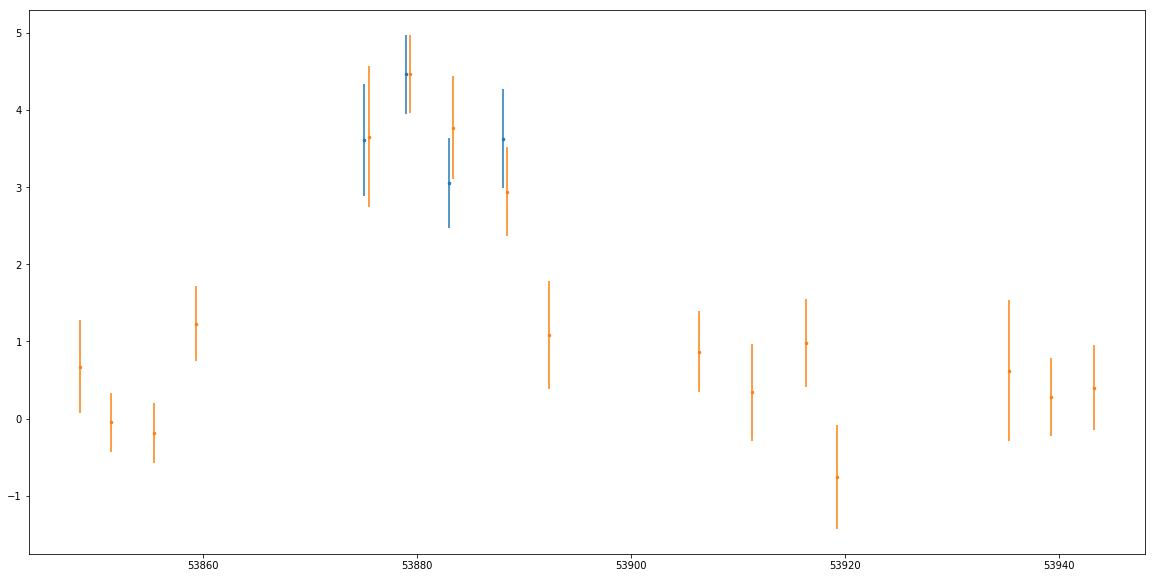

In [159]:
for match in matches:
    print len(match[-1])
    print np.rad2deg(match[0][0]['ra']), np.rad2deg(match[0][0]['dec'])
    lc_fluxes = match[0]["flux"]
    factor = max(match[-1]['flux']) / max(lc_fluxes)
    lc_fluxes = np.multiply(lc_fluxes, factor)
    lc_errors = np.multiply(match[0]["flux_error"], factor)
    
    plt.figure(figsize=(20,10))
    plt.errorbar(match[-1]["mjd"], match[-1]["flux"],yerr=match[-1]["flux_error"], fmt='.', markersize='5')
    plt.errorbar(match[0]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
    plt.show()

In [100]:
for match in matches:
    print len(match[0])
    lc_fluxes = match[0]["flux"]
    factor = max(match[-1]['flux']) / max(lc_fluxes)
    lc_fluxes = np.multiply(lc_fluxes, factor)
    lc_errors = np.multiply(match[0]["flux_error"], factor)
    
    plt.figure(figsize=(20,10))
    plt.errorbar(match[-1]["mjd"], match[-1]["flux"],yerr=match[-1]["flux_error"], fmt='.', markersize='5')
    plt.errorbar(match[0]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
    plt.show()

In [101]:
date = dates[0]
patch_and_coord = []
degrees = []
for lc in snls_array:
    for patch in patches:

        if butler.datasetExists("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
                dayDiff = butler.get("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
                bbox = dayDiff.getBBox()
                wcs = dayDiff.getWcs()
                
                angle_ra = afwGeom.Angle(lc[0]["ra"])
                angle_dec = afwGeom.Angle(lc[0]["dec"])
                coord = wcs.skyToPixel(angle_ra, angle_dec)
                
                if bbox.contains(afwGeom.Point2I(coord)):
                    patch_and_coord.append((patch, angle_ra.asDegrees(), angle_dec.asDegrees(), np.median(lc['mjd'])))
                    #break
                    
    degrees.append(coord)

In [102]:
for lc in snls_array:
    print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])

214.291841667 53.024825
215.181558333 52.1910638889
214.381666667 52.9124722222
214.8577 52.6409833333
215.571704167 52.9576805556
215.552404167 52.6408472222
214.247466667 52.8825444444
214.340266667 52.4528166667
214.699175 52.7565583333
214.254529167 52.2324
214.847579167 53.0230138889
215.305566667 52.4560777778
215.519875 52.3383666667
215.077520833 52.8971638889
214.6309125 52.4429083333
214.435958333 52.3611805556
214.263475 52.9362527778


In [103]:
degrees

[Point2D(25323.18874, 22303.84902),
 Point2D(14840.43981, 6058.773333),
 Point2D(24286.84096, 20109.64456),
 Point2D(18701.97249, 14806.75441),
 Point2D(10330.56728, 21009.1521),
 Point2D(10498.7165, 14841.67938),
 Point2D(25866.73134, 19539.56048),
 Point2D(24839.16963, 11168.46853),
 Point2D(20568.37307, 17058.296),
 Point2D(25892.95755, 6887.154183),
 Point2D(18818.65779, 22240.92673),
 Point2D(13391.91137, 11223.69696),
 Point2D(10830.02805, 8951.9238),
 Point2D(16120.33044, 19795.23409),
 Point2D(21393.0068, 10957.08075),
 Point2D(23715.23112, 9377.55081),
 Point2D(25669.85971, 20583.06095)]

In [73]:
patch_and_coord

[('25,22', 214.29184166666664, 53.024825, 53875.5),
 ('14,6', 215.18155833333333, 52.191063888888884, 53875.5),
 ('24,20', 214.38166666666666, 52.91247222222222, 53875.510000000002),
 ('25,19', 214.24746666666664, 52.88254444444444, 53890.364999999998),
 ('18,22', 214.84757916666663, 53.02301388888889, 53890.364999999998),
 ('13,11', 215.30556666666664, 52.45607777777778, 53890.364999999998),
 ('25,20', 214.26347499999997, 52.936252777777774, 53913.809999999998)]

In [141]:
pa = '14,6'
ra = 215.18155833333333
dec = 52.191063888888884
#exp = "dayCoadd"
exp = "dayDiff_differenceExp"

visualize(pa, '2006-01-02', ra , dec , exp, frame = 1)
visualize(pa, '2006-01-08', ra, dec,exp, frame = 2)
visualize(pa, '2006-01-31', ra, dec,exp, frame = 3)
visualize(pa, '2006-02-03', ra, dec,exp, frame = 4)

(14840, 6058.8)
(14840, 6058.8)
(14840, 6058.8)
(14840, 6058.8)


In [142]:
visualize(pa, '2006-02-06', ra , dec , exp, frame = 5)
#visualize(pa, '2006-02-08', ra , dec , exp, frame = 6)
visualize(pa, '2006-02-25', ra , dec , exp, frame = 7)
#visualize(pa, '2006-02-20', ra , dec , exp, frame = 8)

(14840, 6058.8)
(14840, 6058.8)


In [31]:
def visualize(patch, date, ra, dec, exp, frame=1):
    
    dataId= {"filter":'r',"tract":0, "patch":patch, 'date':date}
    dayDiff = butler.get(exp, dataId=dataId)
    catalog = butler.get("dayDiff_class_diaSrc", dataId=dataId)
    ds9.mtv(dayDiff, frame=frame)
    ds9.setMaskTransparency(100, frame=frame)
    for source in catalog:

        ds9.dot("o", source.getX(), source.getY(), size = 25, ctype = ds9.RED, frame=frame)

    bbox = dayDiff.getBBox()
    wcs = dayDiff.getWcs()

    angle_ra = afwGeom.Angle(ra, afwGeom.degrees)
    angle_dec = afwGeom.Angle( dec , afwGeom.degrees)
    coord = wcs.skyToPixel(angle_ra, angle_dec)
    print coord
    ds9.dot("o", coord.getX(), coord.getY(), size = 20, ctype = ds9.BLUE, frame=frame)

In [120]:
date = dates[0]
patch_and_coord = []
degrees = []
for patch in patches:
    if butler.datasetExists("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
        dayDiff = butler.get("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
        bbox = dayDiff.getBBox()
        wcs = dayDiff.getWcs()
        print bbox
    

Box2I((11900, 4900), (13099, 6099))
Box2I((11900, 5900), (13099, 7099))
Box2I((11900, 6900), (13099, 8099))
Box2I((11900, 7900), (13099, 9099))
Box2I((11900, 8900), (13099, 10099))
Box2I((11900, 9900), (13099, 11099))
Box2I((11900, 10900), (13099, 12099))
Box2I((11900, 11900), (13099, 13099))
Box2I((11900, 12900), (13099, 14099))
Box2I((11900, 13900), (13099, 15099))
Box2I((11900, 14900), (13099, 16099))
Box2I((11900, 15900), (13099, 17099))
Box2I((11900, 16900), (13099, 18099))
Box2I((11900, 17900), (13099, 19099))
Box2I((11900, 18900), (13099, 20099))
Box2I((11900, 19900), (13099, 21099))
Box2I((11900, 20900), (13099, 22099))
Box2I((11900, 21900), (13099, 23099))
Box2I((11900, 22900), (13099, 24099))
Box2I((11900, 23900), (13099, 25099))
Box2I((11900, 24900), (13099, 26099))
Box2I((12900, 4900), (14099, 6099))
Box2I((12900, 5900), (14099, 7099))
Box2I((12900, 6900), (14099, 8099))
Box2I((12900, 7900), (14099, 9099))
Box2I((12900, 8900), (14099, 10099))
Box2I((12900, 9900), (14099, 11